In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"D:\Data Analysis Projects\Loan Approval Prediction using Python\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df=df.drop('Loan_ID',axis=1)

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


#### Fill the missing values in categorical columns with mode

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

#### Fill the missing values in numerical columns with appropriate measures

In [8]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

## Exploratory Data Analysis

#### Distribution of the loan status column

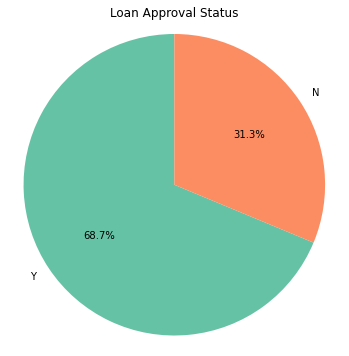

In [9]:
loan_status_count = df['Loan_Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
plt.title('Loan Approval Status')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()

#### Distribution of the gender column

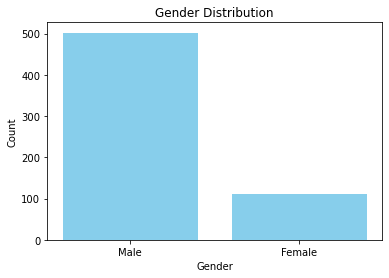

In [10]:
gender_count = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(gender_count.index, gender_count.values, color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Distribution of the martial status column

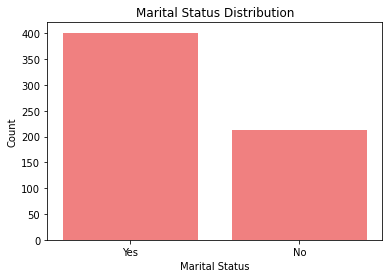

In [11]:
married_count = df['Married'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(married_count.index, married_count.values, color='lightcoral')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

#### Distribution of the education column

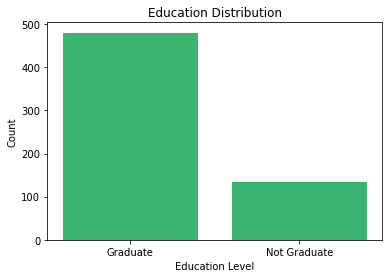

In [12]:
education_count = df['Education'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(education_count.index, education_count.values, color='mediumseagreen')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

#### Distribution of the self-employment column

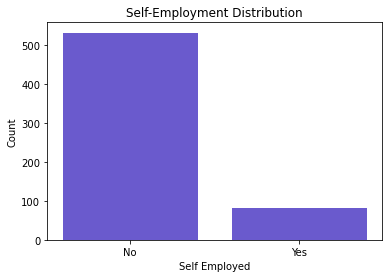

In [13]:
self_employed_count = df['Self_Employed'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(self_employed_count.index, self_employed_count.values, color='slateblue')
plt.title('Self-Employment Distribution')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

#### Distribution of the Applicant Income column

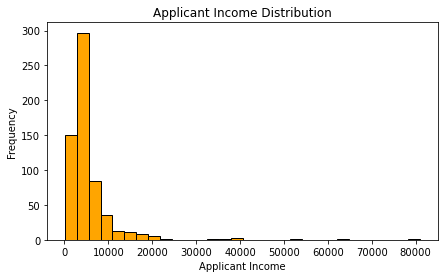

In [14]:
plt.figure(figsize=(7, 4))
plt.hist(df['ApplicantIncome'], bins=30, color='orange', edgecolor='black')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

#### Relationship between the income of the loan applicant and the loan status 

<Figure size 504x288 with 0 Axes>

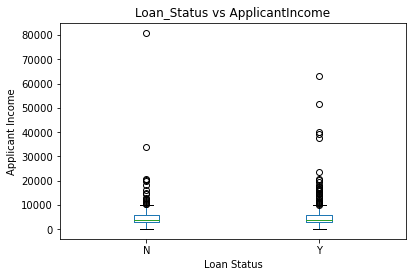

In [15]:
plt.figure(figsize=(7, 4))
df.boxplot(column='ApplicantIncome', by='Loan_Status', grid=False)
plt.title('Loan_Status vs ApplicantIncome')
plt.suptitle('')  # Removes the automatic suptitle added by pandas
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [16]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removal of outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

#### Relationship between the loan amount and the loan status

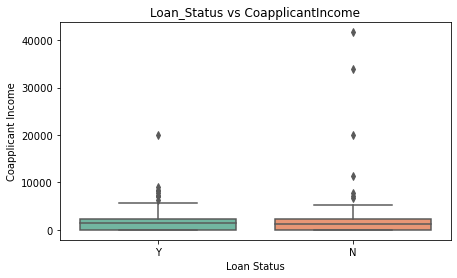

In [17]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Loan_Status', y='CoapplicantIncome', palette='Set2')
plt.title('Loan_Status vs CoapplicantIncome')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()

#### Relationship between credit history and loan status

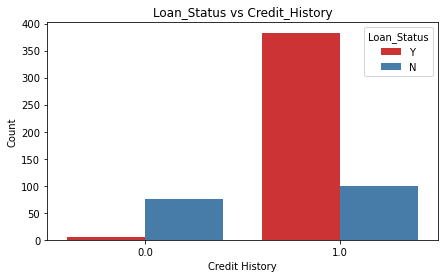

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Credit_History', hue='Loan_Status', palette='Set1')
plt.title('Loan_Status vs Credit_History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

#### Relationship between property area and the loan status

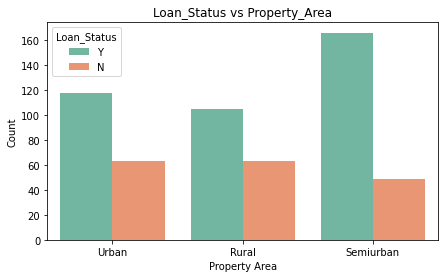

In [19]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status', palette='Set2')
plt.title('Loan_Status vs Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

## Data Preparation and Training Loan Approval Prediction Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
available_cat_cols = [col for col in cat_cols if col in df.columns]

df_encoded = pd.get_dummies(df, columns=available_cat_cols, drop_first=True)


# Spliting the dataset into features (X) and target (y)
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

# target is still categorical (like 'Y'/'N'), converting it to binary
y = y.map({'Y': 1, 'N': 0})  

# Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Training the Support Vector Classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)


SVC(random_state=42)

In [21]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]


### Each element represents a predicted loan status:

#### 1 = Approved

#### 0 = Not Approved

In [22]:
# Converting X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Adding the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
560        -0.217450          -0.554870   -0.432481          0.247534   
231        -0.196490          -0.648799   -1.633454         -2.520343   
496        -0.767019           0.011029   -0.450678          0.247534   
466        -0.589623          -0.002944   -1.123951         -2.520343   
177         0.723718           3.737112    6.609590          0.247534   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
560        0.410358            1            1             0             1   
231        0.410358            1            1             0             0   
496        0.410358            1            1             0             0   
466       -2.436896            1            1             0             0   
177       -2.436896            1            1             0             0   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
560              0               